In [ ]:
import pandas as pd
from datetime import datetime 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil import tz
from pathlib import Path

In [8]:
activity_log_path = Path().resolve().parent / 'data/raw/activity-log-TOTO.csv'

df = pd.read_csv(
    activity_log_path,
    encoding='latin_1', dtype=str,
    keep_default_na=False
)
df = df.rename(columns={'ï»¿Activity Type':"Activity Type"})
df = df.rename(columns={'New Text': 'New_Text'})


In [ ]:
df.columns

In [ ]:
#Data Cleaning of bad rows due to incorrect image input 
#df.drop([1756, 1757, 1758,1759], axis=0, inplace=True)
#print(df['Time'].to_string(index=False))

In [10]:
#Add in Scenario Run based off Date
conditions = [
    (df['Date'] == ('2/12/2024')),
    (df['Date'] == ('2/13/2024')),
    (df['Date'] == ('2/14/2024')),
    (df['Date'] == ('2/15/2024'))
    ]
     
day = ['Day 1', 'Day 2', 'Day 3', 'Day 4']

    
df.insert(1, "Day", np.select(conditions, day, ''), True)
df.head()

,Activity Type,Day,Date,Time,User ID,Username,Team,Document ID,Line ID,Line Number,Original Text,New_Text,Image ID,Image Name,Image Notes
0,set_image,Day 1,2/12/2024,13:20:20.581306000+00:00,872c8a82-ce52-43fd-a552-9424dcd26a8a,hunter.duke,D,1a0cf18f-d4d9-4bc5-a4b0-7e862eac6139,,1,,,a4e1df72-cd04-462f-81df-f998b6980c54,null,
1,set_image,Day 1,2/12/2024,13:20:30.975403000+00:00,872c8a82-ce52-43fd-a552-9424dcd26a8a,hunter.duke,D,1a0cf18f-d4d9-4bc5-a4b0-7e862eac6139,,1,,,a4e1df72-cd04-462f-81df-f998b6980c54,SCRAAWL OVERVIEW,
2,add,Day 1,2/12/2024,13:52:40.064000000+00:00,80a68e6e-57ca-479c-8570-0e8d4c907979,woltersh,A,68408a80-aa7a-4edd-9821-469d2452fcd5,08d87698-584d-4c25-88fa-2285148fc112,1,,@teamawesome,,,
3,delete,Day 1,2/12/2024,13:54:03.564000000+00:00,80a68e6e-57ca-479c-8570-0e8d4c907979,woltersh,A,68408a80-aa7a-4edd-9821-469d2452fcd5,08d87698-584d-4c25-88fa-2285148fc112,1,,@teamawesome,,,
4,add,Day 1,2/12/2024,13:54:39.553000000+00:00,80a68e6e-57ca-479c-8570-0e8d4c907979,woltersh,A,68408a80-aa7a-4edd-9821-469d2452fcd5,145291d9-7009-4e37-9f95-52d8d6c913e1,2,,Fragmentation,,,


In [ ]:
#change time to eastern from zulu
#df['Time'] = df['Time'].dt.tz_convert('US/Eastern')

#df['Time'] = df['Time'].dt.strftime("%H:%M:%S")

In [11]:
#Categorize the action in each line and count number of type of linkages in a line

def find_chars(test_string):
    string_output = {'empty': False} #something not there  
    if not (test_string): #nothing there 
        return {'empty': True}
    string_output['@'] = test_string.count('@')
    string_output['>'] = test_string.count('>')
    string_output['+'] = test_string.count('+')
    string_output['&'] = test_string.count('&')
    string_output['~'] = test_string.count('~')
    string_output['NEW'] = test_string.count('NEW') or test_string.count('new')
    return string_output

#print (find_chars('new +SituationalContext'))

In [12]:
#describe what the count of linkages means  
def categorize_cell(data):
    output = ''
    if data['empty']:
        return 'Empty'
    if all(not x for x in data.values()):
        return 'No Links'    
    if data['NEW'] > 0:
        output = f'NEW{output}'
    if data['@'] > 0 and data['@'] <= 1 :
        output = f'{output} Account'
    if data['@'] > 1:
        output = f'{output} Account Account'
    if data['>'] > 0:
        output = f'{output} BEND'
    if data['+'] > 0 and data['+'] <= 1:
        output = f'{output} Tag'
    if data['+'] > 1:
        output = f'{output} Tag Tag'
    if data['&'] > 0 and data['&'] <= 1:
        output = f'{output} Group'
    if data['&'] > 1:
        output = f'{output} Group Group'
    if data['~'] > 0:
        output = f'{output} Class' 
        
    return output 


In [27]:
#mapping of action in a line 
def cell_description(data):
    cell = [
        (data == 'Empty'),
        (data =='No Links'),
        (data =='NEW'),
        (data =='NEW Account'),
        (data =='NEW Account Account'),
        (data =='NEW Account Group'),
        (data =='NEW Account Account Group'),
        (data =='NEW Account Tag'),
        (data =='NEW Account Account Tag'),
        (data =='NEW Account BEND'),
        (data =='NEW Account Account BEND'),
        (data =='NEW Account Class'),
        (data =='NEW Account Account Class'),
        (data =='NEW Group'),
        (data =='NEW Group Group'),
        (data =='NEW Tag'),
        (data =='NEW Tag Tag'),
        (data =='NEW Tag Group'),
        (data =='NEW Tag Tag Group'),
        (data ==' Account'),
        (data ==' Account Account'),
        (data ==' Account BEND'),
        (data ==' Account Account BEND'),
        (data ==' Account Tag'),
        (data ==' Account Account Tag'),
        (data ==' Account Tag Tag'), 
        (data ==' Account Account Tag Tag'), 
        (data ==' Account BEND Tag'),
        (data ==' Account Account BEND Tag'),
        (data ==' Account BEND Tag Tag'), 
        (data ==' Account Account BEND Tag Tag'),
        (data ==' Account Group'),
        (data ==' Account Account Group'),
        (data ==' Account Group Group'),
        (data ==' Account Account Group Group'),
        (data ==' Account BEND Group'),
        (data ==' Account Account BEND Group'),
        (data ==' Account BEND Group Group'),
        (data ==' Account Account BEND Group Group'),
        (data ==' Account Tag Group'),
        (data ==' Account Account Tag Group'),
        (data ==' Account Account Tag Tag Group'),
        (data ==' Account Account Tag Tag Group Group'),
        (data ==' Account BEND Tag Group'),
        (data ==' Account Account BEND Tag Group'),
        (data ==' Account BEND Tag Tag Group'), 
        (data ==' Account Account BEND Tag Tag Group'),
        (data ==' Account BEND Tag Group Group'),
        (data ==' Account Account BEND Tag Group Group'),
        (data ==' Account BEND Tag Tag Group Group'), 
        (data ==' Account Account BEND Tag Tag Group Group'),
        (data ==' Account Class'),
        (data ==' Account Account Class'), 
        (data ==' Account BEND Class'),
        (data ==' Account Account BEND Class'),
        (data ==' Account Tag Class'),
        (data ==' Account Account Tag Class'),
        (data ==' Account Account Tag Tag Class'),
        (data ==' Account Group Class'),
        (data ==' Account Account Group Class'),
        (data ==' Account Account Group Group Class'),
        (data ==' Account BEND Tag Class'),
        (data ==' Account BEND Tag Tag Class'),
        (data ==' Account Account BEND Tag Class'),
        (data ==' Account Account BEND Tag Tag Class'),
        (data ==' Account BEND Tag Group Class'),
        (data ==' Account Account BEND Tag Group Class'),
        (data ==' Account BEND Tag Tag Group Class'), 
        (data ==' Account Account BEND Tag Tag Group Class'),
        (data ==' Account BEND Tag Group Group Class'),
        (data ==' Account Account BEND Tag Group Group Class'),
        (data ==' Account BEND Tag Tag Group Group Class'), 
        (data ==' Account Account BEND Tag Tag Group Group Class'),
        (data ==' BEND'),
        (data ==' BEND Tag'),
        (data ==' BEND Tag Tag'), 
        (data ==' BEND Group'),
        (data ==' BEND Group Group'),
        (data ==' BEND Tag Group'),
        (data ==' BEND Tag Tag Group'),
        (data ==' BEND Tag Tag Group Group'),
        (data ==' BEND Tag Group Group'),
        (data ==' BEND Class'),
        (data ==' BEND Tag Class'),
        (data ==' BEND Tag Tag Class'),
        (data ==' BEND Tag Group Class'),
        (data ==' BEND Tag Tag Group Class'), 
        (data ==' BEND Tag Group Group Class'),
        (data ==' BEND Tag Tag Group Group Class'), 
        (data ==' Tag'),
        (data ==' Tag Tag'),
        (data ==' Tag Group'),
        (data ==' Tag Tag Group'),
        (data ==' Tag Tag Group Group'),
        (data ==' Tag Class'),
        (data ==' Tag Tag Class'), 
        (data ==' Tag Group Class'), 
        (data ==' Tag Tag Group Class'), 
        (data ==' Tag Group Group Class'),
        (data ==' Tag Tag Group Group Class'),
        (data ==' Group'),
        (data ==' Group Group'),
        (data ==' Group Class'),
        (data ==' Group Group Class'),
        (data ==' Class')
    ]
    
    description = [
        'Empty',
        'No Linkages',
        'No Linkages',
        'New Account',
        'New Account',
        'Linkage - Account and Group',
        'Linkage - Account and Group',
        'Linkage - Account and Tag',
        'Linkage - Account and Tag',
        'Linkage - Account and BEND',
        'Linkage - Account and BEND',
        'Account Classification',
        'Account Classification',  
        'New Group',
        'New Group',
        'New Tag',
        'New Tag',
        'Linkage - Tag and Group',
        'Linkage - Tag and Group',
        'Account Statement', 
        'Linkage - Account and Account',
        'Linkage - Account and BEND',
        'Linkage - Account and BEND',
        'Linkage - Account and Tag',
        'Linkage - Account and Tag',
        'Linkage - Account and Tag',
        'Linkage - Account and Tag',
        'Linkage - Account, BEND, Tag',
        'Linkage - Account, BEND, Tag',
        'Linkage - Account, BEND, Tag',
        'Linkage - Account, BEND, Tag',
        'Linkage - Account and Group',
        'Linkage - Account and Group',
        'Linkage - Account and Group',
        'Linkage - Account and Group',
        'Linkage - Account, BEND, Group',
        'Linkage - Account, BEND, Group',
        'Linkage - Account, BEND, Group',
        'Linkage - Account, BEND, Group',
        'Linkage - Account, Tag, Group',
        'Linkage - Account, Tag, Group',
        'Linkage - Account, Tag, Group',
        'Linkage - Account, Tag, Group',
        'Linkage - Account, BEND, Tag, Group',
        'Linkage - Account, BEND, Tag, Group',
        'Linkage - Account, BEND, Tag, Group',
        'Linkage - Account, BEND, Tag, Group',
        'Linkage - Account, BEND, Tag, Group',
        'Linkage - Account, BEND, Tag, Group',
        'Linkage - Account, BEND, Tag, Group',
        'Linkage - Account, BEND, Tag, Group',
        'Account Classification',
        'Account Classification',
        'Linkage - Account, BEND, Account Classification',
        'Linkage - Account, BEND, Account Classification',
        'Linkage - Account, Tag, Account Classifcation',
        'Linkage - Account, Tag, Account Classifcation',
        'Linkage - Account, Tag, Account Classifcation',
        'Linkage - Account, Group, Account Classification',
        'Linkage - Account, Group, Account Classification',
        'Linkage - Account, Group, Account Classification',
        'Linkage - Account, BEND, Tag, Account Classification',
        'Linkage - Account, BEND, Tag, Account Classification',
        'Linkage - Account, BEND, Tag, Account Classification',
        'Linkage - Account, BEND, Tag, Account Classification',
        'Linkage - Account, BEND, Tag, Group, Account Classification',
        'Linkage - Account, BEND, Tag, Group, Account Classification',
        'Linkage - Account, BEND, Tag, Group, Account Classification',
        'Linkage - Account, BEND, Tag, Group, Account Classification',
        'Linkage - Account, BEND, Tag, Group, Account Classification',
        'Linkage - Account, BEND, Tag, Group, Account Classification',
        'Linkage - Account, BEND, Tag, Group, Account Classification',
        'Linkage - Account, BEND, Tag, Group, Account Classification',
        'BEND Statement',
        'Linkage - BEND and Tag',
        'Linkage - BEND and Tag',
        'Linkage - BEND and Group',
        'Linkage - BEND and Group',
        'Linkage - BEND, Tag, Group',
        'Linkage - BEND, Tag, Group',
        'Linkage - BEND, Tag, Group',
        'Linkage - BEND, Tag, Group',
        'Linkage - BEND and Account Classification',
        'Linkage - BEND Tag and Account Classification',
        'Linkage - BEND Tag and Account Classification',
        'Linkage - BEND, Tag, Group, Account Classification',
        'Linkage - BEND, Tag, Group, Account Classification',
        'Linkage - BEND, Tag, Group, Account Classification',
        'Linkage - BEND, Tag, Group, Account Classification',
        'Tag Statement',
        'Tag Statement',
        'Linkage - Tag and Group',
        'Linkage - Tag and Group',
        'Linkage - Tag and Group',
        'Linkage - Tag and Account Classification',
        'Linkage - Tag and Account Classification',
        'Linkage - Tag, Group, Account Classification',
        'Linkage - Tag, Group, Account Classification',
        'Linkage - Tag, Group, Account Classification',
        'Linkage - Tag, Group, Account Classification',
        'Group Statement',
        'Group Statement',
        'Linkage - Group and Account Classification',
        'Linkage - Group and Account Classification',
        'Account Classification Statement' 
    ]
    
    return np.select(cell, description, '')

In [28]:
#put into dataframe action the user took pulled out the new text

df['Type of Action'] = df['New_Text'].apply(lambda x: cell_description(categorize_cell(find_chars(x))))

In [31]:
##Check for errors. Zero means it wasn't categorized
df.loc[df['Type of Action']=='']

,Activity Type,Day,Date,Time,User ID,Username,Team,Document ID,Line ID,Line Number,Original Text,New_Text,Image ID,Image Name,Image Notes,Type of Action
308,edit,Day 1,2/12/2024,17:45:20.292000000+00:00,3ab1ee5b-0c59-4cdf-9aea-e9960dbbd985,evan.kidd,B,edcde28a-aa6e-4b41-8012-5aec38770435,f258815e-7ea4-4af2-a348-614877016740,2,NEW +Day1Channels &RedPEACE,NEW +Day1Channels &RedPEACE &D,,,,
309,edit,Day 1,2/12/2024,17:45:22.369000000+00:00,3ab1ee5b-0c59-4cdf-9aea-e9960dbbd985,evan.kidd,B,edcde28a-aa6e-4b41-8012-5aec38770435,f258815e-7ea4-4af2-a348-614877016740,2,NEW +Day1Channels &RedPEACE &D,NEW +Day1Channels &RedPEACE &Friends_of_NATO,,,,
310,edit,Day 1,2/12/2024,17:45:30.604000000+00:00,3ab1ee5b-0c59-4cdf-9aea-e9960dbbd985,evan.kidd,B,edcde28a-aa6e-4b41-8012-5aec38770435,f258815e-7ea4-4af2-a348-614877016740,2,NEW +Day1Channels &RedPEACE &Friends_of_NATO,NEW +Day1Channels &RedPEACE &Friends_of_HATO,,,,
311,edit,Day 1,2/12/2024,17:45:33.821000000+00:00,3ab1ee5b-0c59-4cdf-9aea-e9960dbbd985,evan.kidd,B,edcde28a-aa6e-4b41-8012-5aec38770435,f258815e-7ea4-4af2-a348-614877016740,2,NEW +Day1Channels &RedPEACE &Friends_of_HATO,NEW +Day1Channels &RedPEACE &Friends_of_HATO &...,,,,
312,edit,Day 1,2/12/2024,17:45:47.673000000+00:00,3ab1ee5b-0c59-4cdf-9aea-e9960dbbd985,evan.kidd,B,edcde28a-aa6e-4b41-8012-5aec38770435,f258815e-7ea4-4af2-a348-614877016740,2,NEW +Day1Channels &RedPEACE &Friends_of_HATO &...,NEW +Day1Channels &RedPEACE &,,,,
313,edit,Day 1,2/12/2024,17:45:55.302000000+00:00,3ab1ee5b-0c59-4cdf-9aea-e9960dbbd985,evan.kidd,B,edcde28a-aa6e-4b41-8012-5aec38770435,f258815e-7ea4-4af2-a348-614877016740,2,NEW +Day1Channels &RedPEACE &,NEW +Day1Channels &RedPEACE &Friends_of_HATO &...,,,,
314,edit,Day 1,2/12/2024,17:46:03.455000000+00:00,3ab1ee5b-0c59-4cdf-9aea-e9960dbbd985,evan.kidd,B,edcde28a-aa6e-4b41-8012-5aec38770435,f258815e-7ea4-4af2-a348-614877016740,2,NEW +Day1Channels &RedPEACE &Friends_of_HATO &...,NEW +Day1Channels &RedPEACE &Friends_of_HATO &...,,,,
315,edit,Day 1,2/12/2024,17:46:05.943000000+00:00,3ab1ee5b-0c59-4cdf-9aea-e9960dbbd985,evan.kidd,B,edcde28a-aa6e-4b41-8012-5aec38770435,f258815e-7ea4-4af2-a348-614877016740,2,NEW +Day1Channels &RedPEACE &Friends_of_HATO &...,NEW +Day1Channels &RedPEACE &Friends_of_HATO &...,,,,
316,edit,Day 1,2/12/2024,17:46:09.462000000+00:00,3ab1ee5b-0c59-4cdf-9aea-e9960dbbd985,evan.kidd,B,edcde28a-aa6e-4b41-8012-5aec38770435,f258815e-7ea4-4af2-a348-614877016740,2,NEW +Day1Channels &RedPEACE &Friends_of_HATO &...,NEW +Day1Channels &RedPEACE &Friends_of_HATO &...,,,,
317,edit,Day 1,2/12/2024,17:46:13.090000000+00:00,3ab1ee5b-0c59-4cdf-9aea-e9960dbbd985,evan.kidd,B,edcde28a-aa6e-4b41-8012-5aec38770435,f258815e-7ea4-4af2-a348-614877016740,2,NEW +Day1Channels &RedPEACE &Friends_of_HATO &...,NEW +Day1Channels &RedPEACE &Friends_of_HATO &...,,,,


In [ ]:
##find and eliminate errors
##put row number in [#] for each

#print (df['New_Text'].values[1594])
#print (find_chars(df['New_Text'].values[1594]))
#print ((categorize_cell(find_chars(df['New_Text'].values[1594]))))
#print(cell_description(categorize_cell(find_chars(df['New_Text'].values[1594]))))

In [32]:
#organize image events by new and edited events 
#new images 
df['Type of Action'] = np.where ((df['Activity Type'] =='set_image') & (df['Image Name'] == 'null'),'New Image', df['Type of Action'])
df['Activity Type'] = np.where (df['Type of Action'] == 'New Image','Add Image', df['Activity Type'])

#edited images
df['Type of Action'] = np.where ((df['Activity Type'] =='set_image'),'Edit Image', df['Type of Action'])
df['Activity Type'] = np.where (df['Type of Action'] == 'Edit Image','Edit Image', df['Activity Type'])
#All_Teams.loc[All_Teams['Activity Type']=='set_image']

In [33]:
#data clean up
df['Type of Action'] = np.where ((df['Type of Action'] == 'Empty') & (df['Activity Type'] == 'delete'),'Line Deletion', df['Type of Action'])
df['Type of Action'] = np.where ((df['Type of Action'] == 'Empty') & (df['Activity Type'] == 'edit'),'Line Deletion', df['Type of Action'])

In [34]:
#split into multiple dataframes by each team and admin group 
##Team A = daniela.meile@soartech.com, nick.anna@soartech.com,demo1.1@soartech.com, demo1.2@soartech.com
##Team B = damian.jankowski@soartech.com, alex.crowell@soartech.com, demo1.3@soartech.com, demo1.4@soartech.com, demo1.6@soartech.com
##Admin = angela.woods@soartech.com, admin@example.com, rebecca.goolsby@navy.mil

Team_A = df[(df['Team'] == 'A') ]

Team_B = df[(df['Team'] == 'B') ]

Team_C = df[(df['Team'] == 'C') ]

Team_D = df[(df['Team'] == 'D') ]

All_Teams = df

### TEAM A ###
#Timeline of Actvities by Day dataframe creation Team A
Team_A_Day1 = Team_A[(Team_A['Day'] == 'Day 1')]
Team_A_Day2 = Team_A[(Team_A['Day'] == 'Day 2')]
Team_A_Day3 = Team_A[(Team_A['Day'] == 'Day 3')]
Team_A_Day4 = Team_A[(Team_A['Day'] == 'Day 4')]

#By User
Team_A_user1 = df[(df['Username'] == 'woltersh')] #need to specify which data is hers
Team_A_user2 = df[(df['Username'] == 'william.kline')]
Team_A_user3 = df[(df['Username'] == 'antonysumner')]
Team_A_user4 = df[(df['Username'] == 'jestin.morse')]
Team_A_user5 = df[(df['Username'] == 'miles.chrisman')]
Team_A_user6 = df[(df['Username'] == 'bruce.forrester')]

#By User1 By Day
Team_A_user1_Day1 = Team_A_user1[(Team_A_user1['Day'] == 'Day 1')]
Team_A_user1_Day2 = Team_A_user1[(Team_A_user1['Day'] == 'Day 2')]
Team_A_user1_Day3 = Team_A_user1[(Team_A_user1['Day'] == 'Day 3')]
Team_A_user1_Day4 = Team_A_user1[(Team_A_user1['Day'] == 'Day 4')]

#By User2 By Day
Team_A_user2_Day1 = Team_A_user2[(Team_A_user2['Day'] == 'Day 1')]
Team_A_user2_Day2 = Team_A_user2[(Team_A_user2['Day'] == 'Day 2')]
Team_A_user2_Day3 = Team_A_user2[(Team_A_user2['Day'] == 'Day 3')]
Team_A_user2_Day4 = Team_A_user2[(Team_A_user2['Day'] == 'Day 4')]

#By User3 By Day
Team_A_user3_Day1 = Team_A_user3[(Team_A_user3['Day'] == 'Day 1')]
Team_A_user3_Day2 = Team_A_user3[(Team_A_user3['Day'] == 'Day 2')]
Team_A_user3_Day3 = Team_A_user3[(Team_A_user3['Day'] == 'Day 3')]
Team_A_user3_Day4 = Team_A_user3[(Team_A_user3['Day'] == 'Day 4')]

#By User4 By Day
Team_A_user4_Day1 = Team_A_user4[(Team_A_user4['Day'] == 'Day 1')]
Team_A_user4_Day2 = Team_A_user4[(Team_A_user4['Day'] == 'Day 2')]
Team_A_user4_Day3 = Team_A_user4[(Team_A_user4['Day'] == 'Day 3')]
Team_A_user4_Day4 = Team_A_user4[(Team_A_user4['Day'] == 'Day 4')]

#By User5 By Day
Team_A_user5_Day1 = Team_A_user5[(Team_A_user5['Day'] == 'Day 1')]
Team_A_user5_Day2 = Team_A_user5[(Team_A_user5['Day'] == 'Day 2')]
Team_A_user5_Day3 = Team_A_user5[(Team_A_user5['Day'] == 'Day 3')]
Team_A_user5_Day4 = Team_A_user5[(Team_A_user5['Day'] == 'Day 4')]



### TEAM B ###
#Timeline of Actvities by Day dataframe creation 
Team_B_Day1 = Team_B[(Team_B['Day'] == 'Day 1')]
Team_B_Day2 = Team_B[(Team_B['Day'] == 'Day 2')]
Team_B_Day3 = Team_B[(Team_B['Day'] == 'Day 3')]
Team_B_Day4 = Team_B[(Team_B['Day'] == 'Day 4')]

### TEAM C ###
#Timeline of Actvities by Day dataframe creation 
Team_C_Day1 = Team_C[(Team_C['Day'] == 'Day 1')]
Team_C_Day2 = Team_C[(Team_C['Day'] == 'Day 2')]
Team_C_Day3 = Team_C[(Team_C['Day'] == 'Day 3')]
Team_C_Day4 = Team_C[(Team_C['Day'] == 'Day 4')]

### TEAM D ###
#Timeline of Actvities by Day dataframe creation 
Team_D_Day1 = Team_D[(Team_D['Day'] == 'Day 1')]
Team_D_Day2 = Team_D[(Team_D['Day'] == 'Day 2')]
Team_D_Day3 = Team_D[(Team_D['Day'] == 'Day 3')]
Team_D_Day4 = Team_D[(Team_D['Day'] == 'Day 4')]

## All Teams ###
#Timeline of Actvities by Day dataframe creation Team A
All_Teams_Day1 = df[(df['Day'] == 'Day 1')]
All_Teams_Day2 = df[(df['Day'] == 'Day 2')]
All_Teams_Day3 = df[(df['Day'] == 'Day 3')]
All_Teams_Day4 = df[(df['Day'] == 'Day 4')]


### Drop Duplicates of Each Line ###
Team_A_LastOnly = Team_A.drop_duplicates(subset=['Line ID'], keep = 'last')
Team_B_LastOnly = Team_B.drop_duplicates(subset=['Line ID'], keep = 'last')
All_Teams_LastOnly = df.drop_duplicates(subset=['Line ID'], keep = 'last')

Team_A_Day1_LO = Team_A_LastOnly[(Team_A_LastOnly['Day'] == 'Day 1')]
Team_A_Day2_LO = Team_A_LastOnly[(Team_A_LastOnly['Day'] == 'Day 2')]
Team_A_Day3_LO = Team_A_LastOnly[(Team_A_LastOnly['Day'] == 'Day 3')]
Team_A_Day4_LO = Team_A_LastOnly[(Team_A_LastOnly['Day'] == 'Day 4')]

In [36]:
#csv
data_dir = Path().resolve().parent / 'data/interim'
All_Teams_LastOnly.to_csv(data_dir / 'allLO.csv')
Team_A_LastOnly.to_csv(data_dir / 'teamALO.csv')
Team_B_LastOnly.to_csv(data_dir / 'teamBLO.csv')

In [ ]:
#certain term search
#termSearch = Team_A_Day1.

#Team_A_Day1.head()
#termSearch = Team_A_Day1[Team_A_Day1['New_Text'].str.contains('*.protest.*', regex=False)]
#termSearch.head()
                    

In [ ]:
#white cell dataframes 

#certain words/accounts/groups noted by each group 
#day1 = "nato"

#All_Teams_Day1_Content = pd.value_counts(np.array())
#All_Teams_LastOnly['Frequency'] = df['New_Text'].apply(lambda x: x.count(day1))

#dataframes by day 
#All_Teams_Day1['Content Discussed'] = All_Teams_Day1['New_Text'].str.count('NATO')
#All_Teams_LastOnly

In [37]:
#order of data in plots
activity_order =['add','edit','delete', 'Add Image', 'Edit Image']
hue_order = ['add','edit','delete', 'Add Image', 'Edit Image']
action_order = ['New Account', 'New Group', 'New Tag', 'Account Classification', 'New Image', 'Edit Image', 'Linkage - Account and Group', 'Linkage - Account and Tag', ]

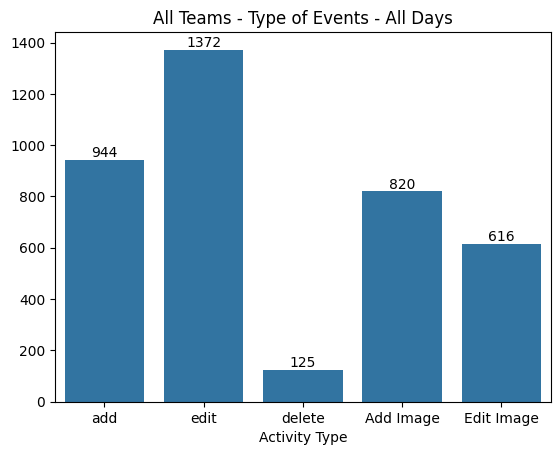

In [ ]:
#Plot of All Activities Across All Teams
figures_dir = Path().resolve().parent / 'reports/figures'
activity_order =['add','edit','delete', 'Add Image', 'Edit Image']
plot = All_Teams.groupby(['Activity Type']).size()
visual = sb.barplot(x = plot.index, y = plot.values, order=activity_order)
visual.set_title('All Teams - Type of Events - All Days')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.savefig(figures_dir / 'AllTeams_allActivities.png')

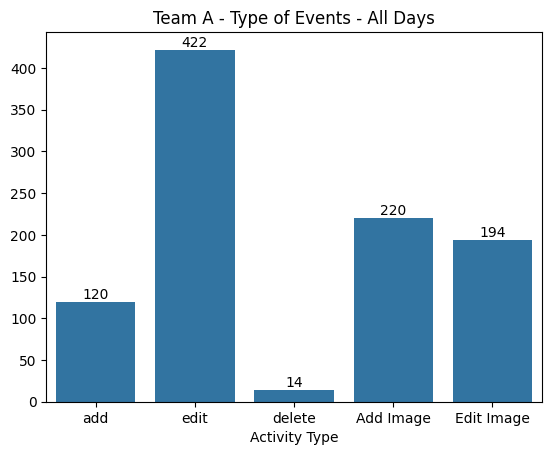

In [ ]:
#Team A Activities 
plot = Team_A.groupby(['Activity Type']).size()
visual = sb.barplot(x = plot.index, y = plot.values, order=activity_order)
visual.set_title('Team A - Type of Events - All Days')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.savefig(figures_dir / 'Team_A_allActivities.png')

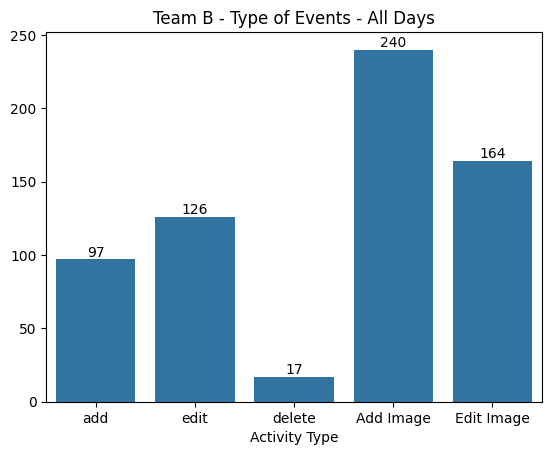

In [ ]:
#Team B All Activities 
plot = Team_B.groupby(['Activity Type']).size()
visual = sb.barplot(x = plot.index, y = plot.values, order=activity_order)
visual.set_title('Team B - Type of Events - All Days')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.savefig(figures_dir / 'Team_B_allActivities.png')

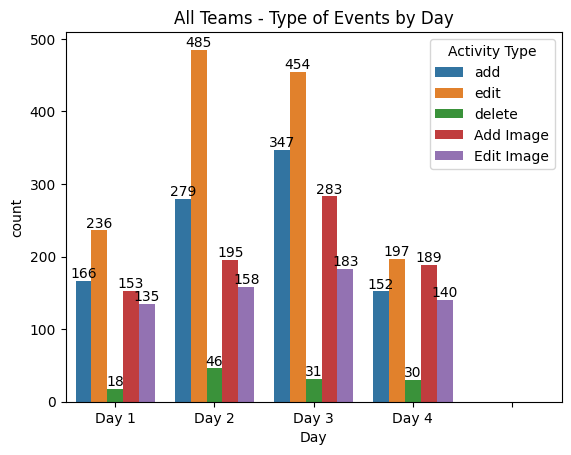

In [ ]:
#All Teams Activity Type by Day 
visual = sb.countplot(x = 'Day',hue = "Activity Type", data = All_Teams, hue_order=hue_order)
visual.set_title('All Teams - Type of Events by Day')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.savefig(figures_dir / 'All_Teams_ActivitiesbyDay.png')

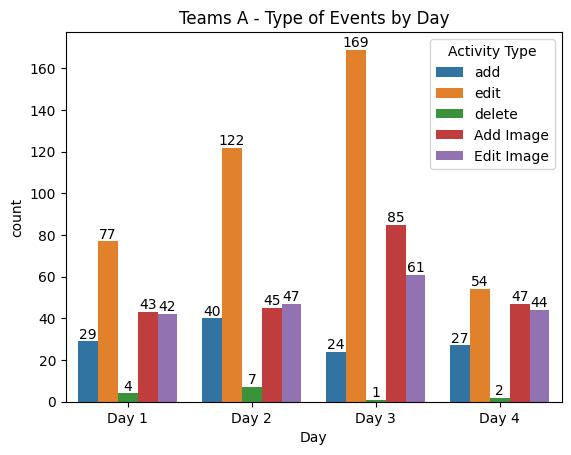

In [ ]:
#Team A Activity Type by Day 
visual = sb.countplot(x = 'Day',hue = "Activity Type", data = Team_A, hue_order=hue_order)
visual.set_title('Teams A - Type of Events by Day')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.savefig(figures_dir / 'Team_A_ActivitiesbyDay.png')

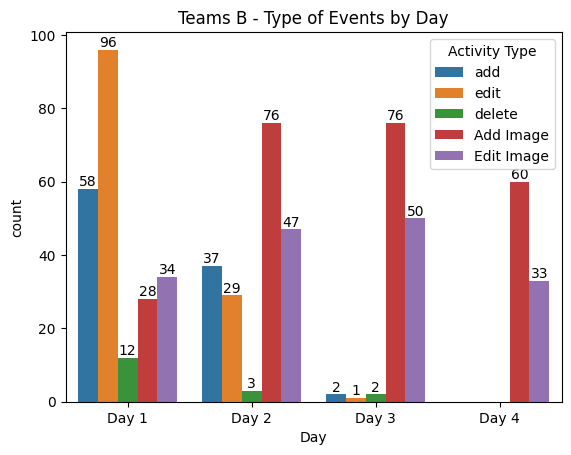

In [ ]:
#Team B Activity Type by Day 
visual = sb.countplot(x = 'Day',hue = "Activity Type", data = Team_B, hue_order=hue_order)
visual.set_title('Teams B - Type of Events by Day')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.savefig(figures_dir / 'Team_B_ActivitiesbyDay.png')

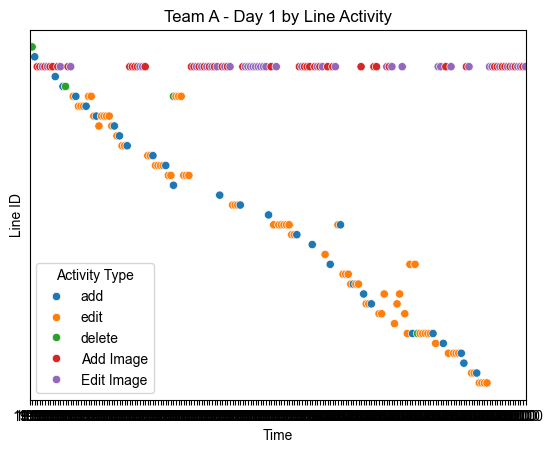

In [ ]:
#TeamA Day 1 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Line ID', hue = 'Activity Type', data = Team_A_Day1, hue_order = hue_order)
visual.set_yticks([])
visual.set_title('Team A - Day 1 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day1['Time'])), (max(Team_A_Day1['Time'])))
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig(figures_dir / 'Team_A_Day1_linechanges.png')

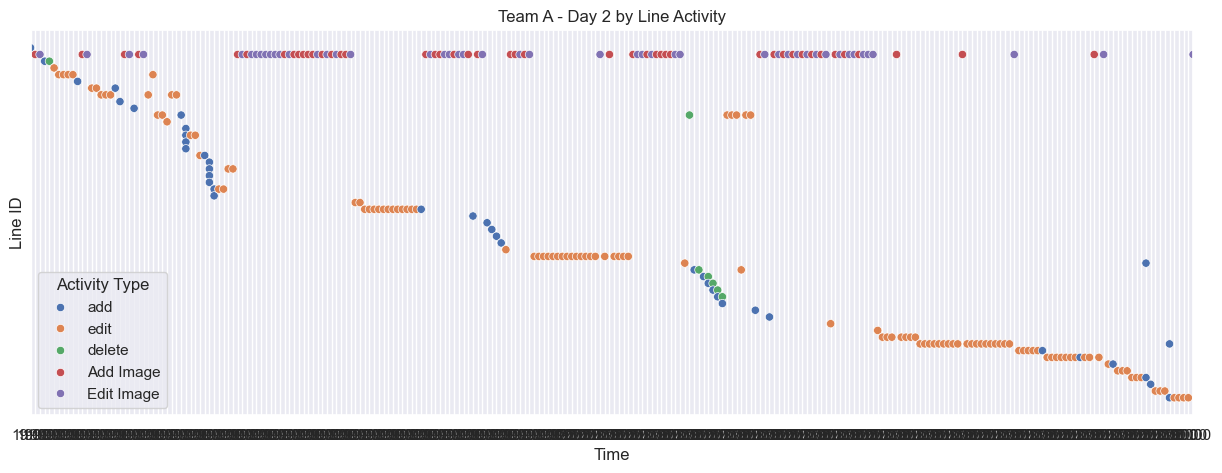

In [ ]:
#TeamA Day 2 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Line ID', hue = 'Activity Type', data = Team_A_Day2, hue_order = hue_order)
visual.set_title('Team A - Day 2 by Line Activity')
visual.set_yticks([])
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day2['Time'])), (max(Team_A_Day2['Time'])))
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig(figures_dir / 'Team_A_Day2_linechanges.png')

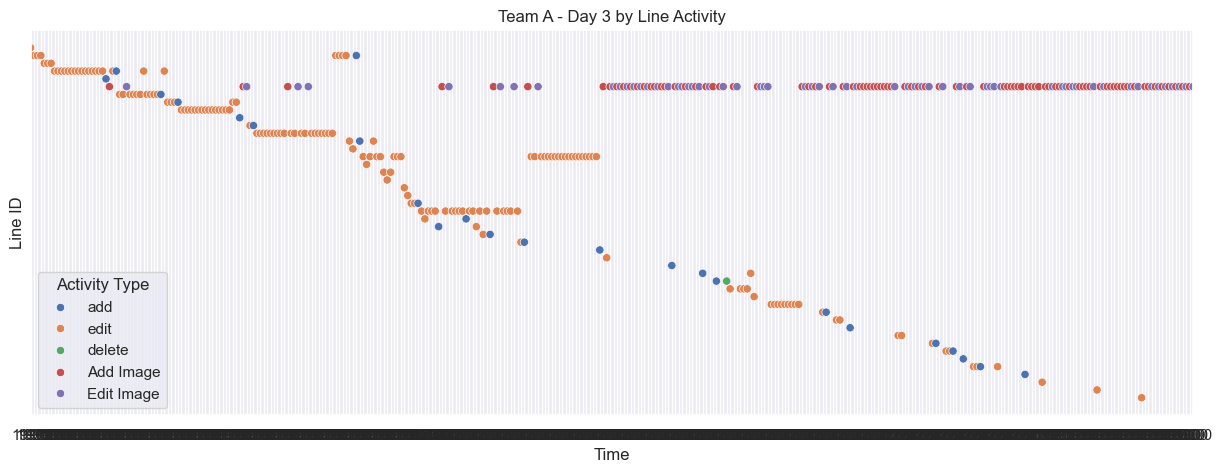

In [ ]:
#TeamA Day 3 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Line ID', hue = 'Activity Type', data = Team_A_Day3, hue_order = hue_order)
visual.set_title('Team A - Day 3 by Line Activity')
visual.set_yticks([])
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day3['Time'])), (max(Team_A_Day3['Time'])))
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig(figures_dir / 'Team_A_Day3_linechanges.png')

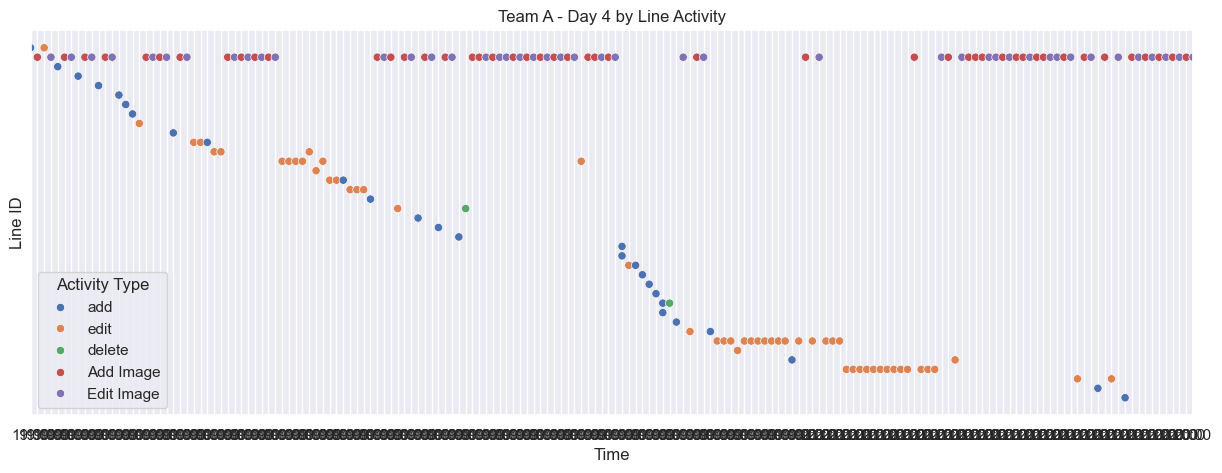

In [ ]:
#TeamA Day 4 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Line ID', hue = 'Activity Type', data = Team_A_Day4, hue_order = hue_order)
visual.set_title('Team A - Day 4 by Line Activity')
visual.set_yticks([])
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day4['Time'])), (max(Team_A_Day4['Time'])))
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig(figures_dir / 'Team_A_Day4_linechanges.png')

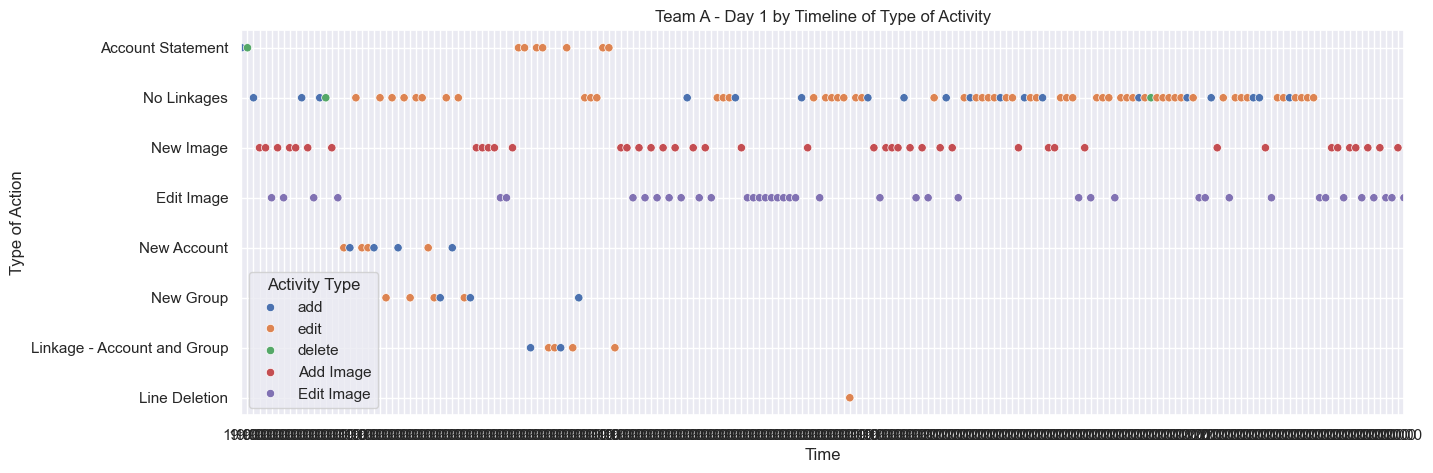

In [ ]:
#TeamA Day 1 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_Day1, hue_order = hue_order)
#visual.set_yticks([])
visual.set_title('Team A - Day 1 by Timeline of Type of Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day1['Time'])), (max(Team_A_Day1['Time'])))
sb.set_theme(rc={"figure.figsize":(15, 6)})
plt.savefig(figures_dir / 'Team_A_Day1_timeline_typeofactivity.png')

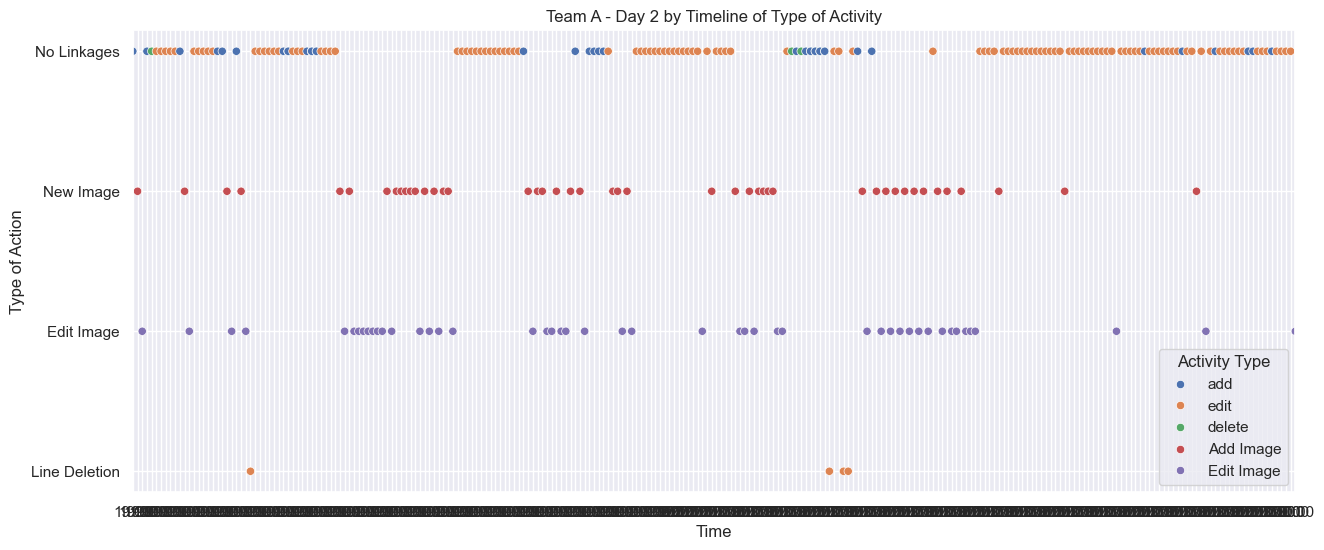

In [ ]:
#TeamA Day 2 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_Day2, hue_order = hue_order)
#visual.set_yticks([])
visual.set_title('Team A - Day 2 by Timeline of Type of Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day2['Time'])), (max(Team_A_Day2['Time'])))
sb.set_theme(rc={"figure.figsize":(15, 6)})
plt.savefig(figures_dir / 'Team_A_Day2_timeline_typeofactivity.png')

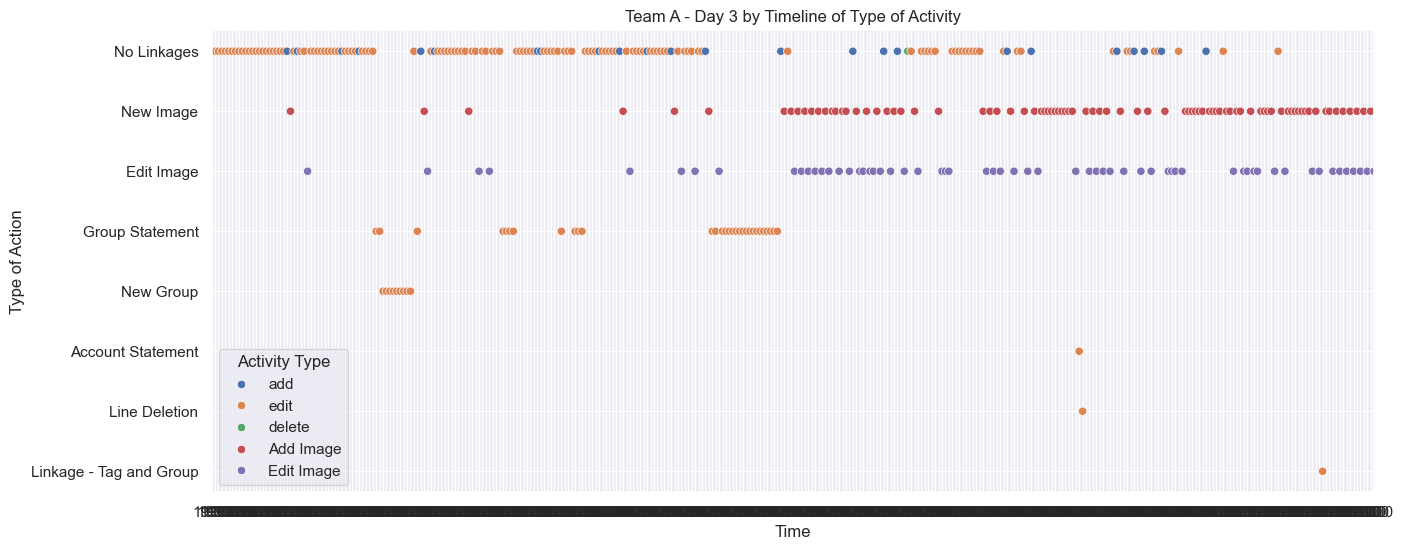

In [ ]:
#TeamA Day 3 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_Day3, hue_order = hue_order)
#visual.set_yticks([])
visual.set_title('Team A - Day 3 by Timeline of Type of Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day3['Time'])), (max(Team_A_Day3['Time'])))
sb.set_theme(rc={"figure.figsize":(15, 6)})
plt.savefig(figures_dir / 'Team_A_Day3_timeline_typeofactivity.png')

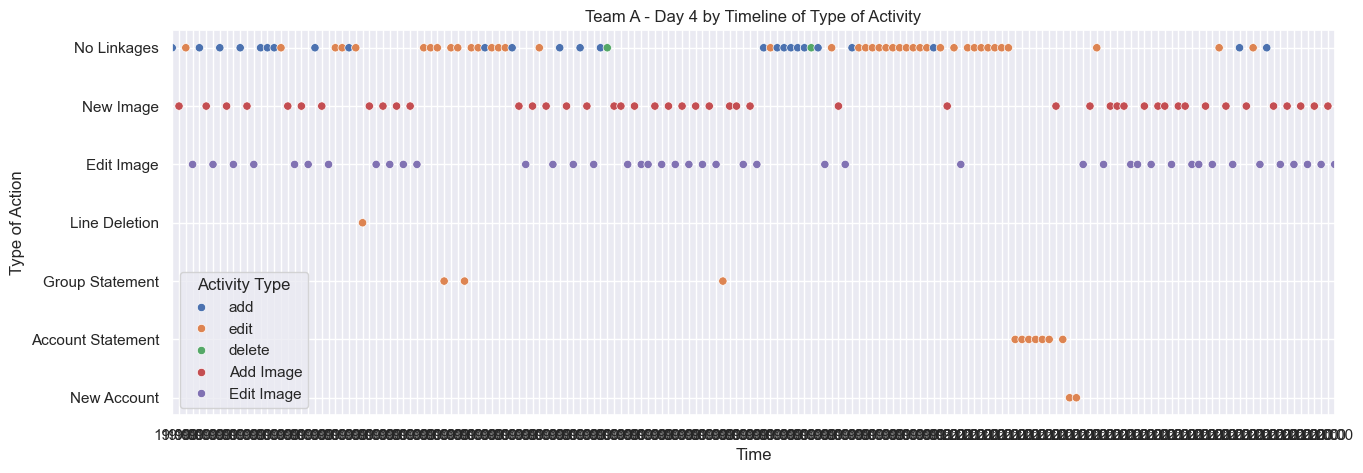

In [ ]:
#TeamA Day 4 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_Day4, hue_order = hue_order)
#visual.set_yticks([])
visual.set_title('Team A - Day 4 by Timeline of Type of Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day4['Time'])), (max(Team_A_Day4['Time'])))
sb.set_theme(rc={"figure.figsize":(15, 6)})
plt.savefig(figures_dir / 'Team_A_Day4_timeline_typeofactivity.png')

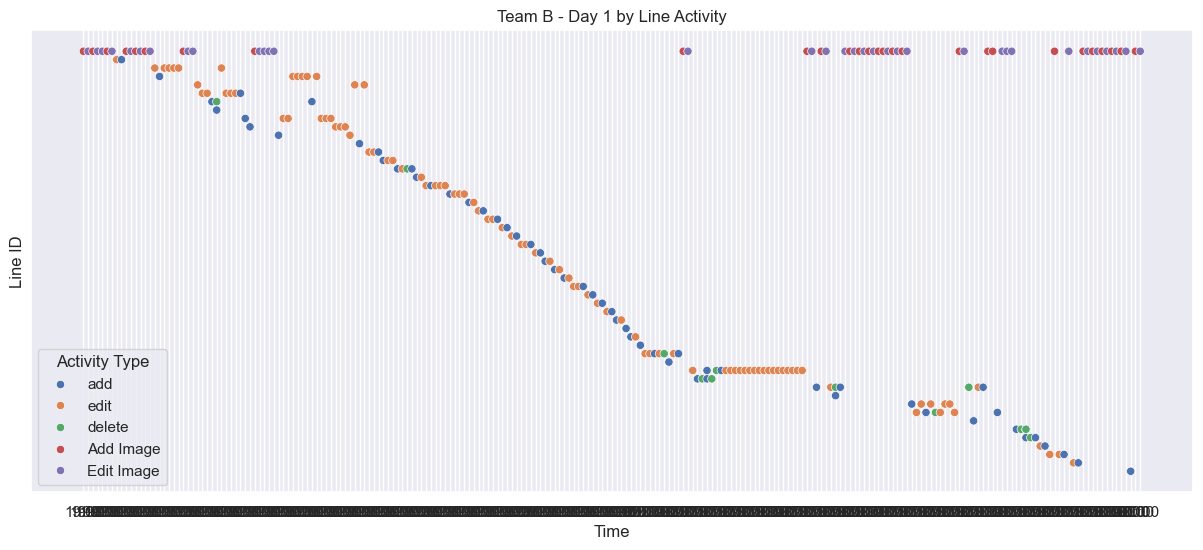

In [ ]:
#TeamB Day 1 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Line ID', hue = 'Activity Type', data = Team_B_Day1, hue_order = hue_order)
visual.set_title('Team B - Day 1 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day1['Time'])), (max(Team_A_Day1['Time'])))
visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig(figures_dir / 'Team_B_Day1_linechanges.png')

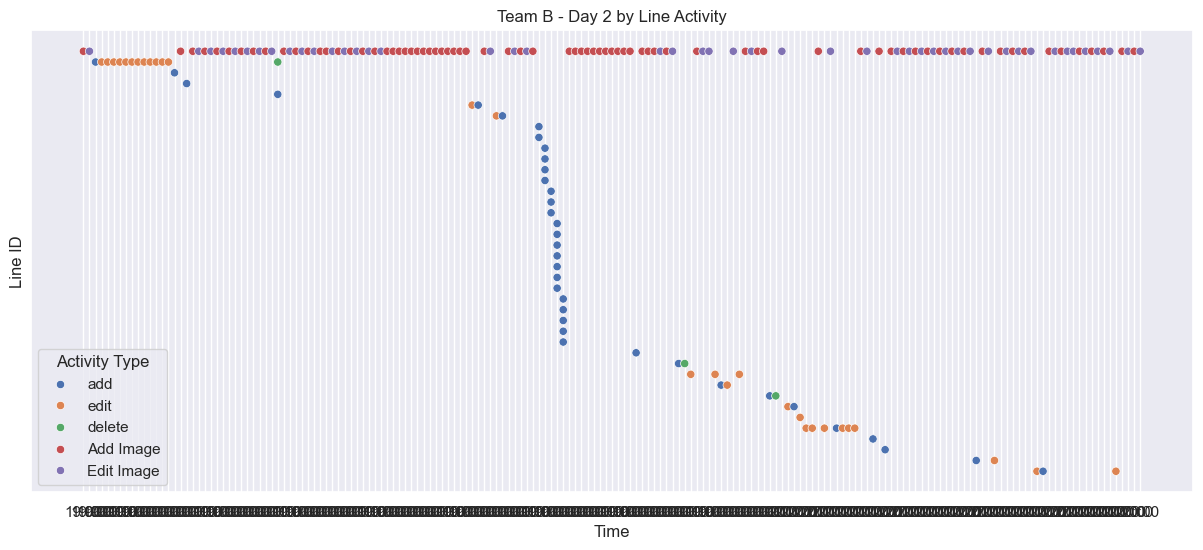

In [ ]:
#TeamB Day 2 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Line ID', hue = 'Activity Type', data = Team_B_Day2, hue_order = hue_order)
visual.set_title('Team B - Day 2 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day2['Time'])), (max(Team_A_Day2['Time'])))
visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig(figures_dir / 'Team_B_Day2_linechanges.png')

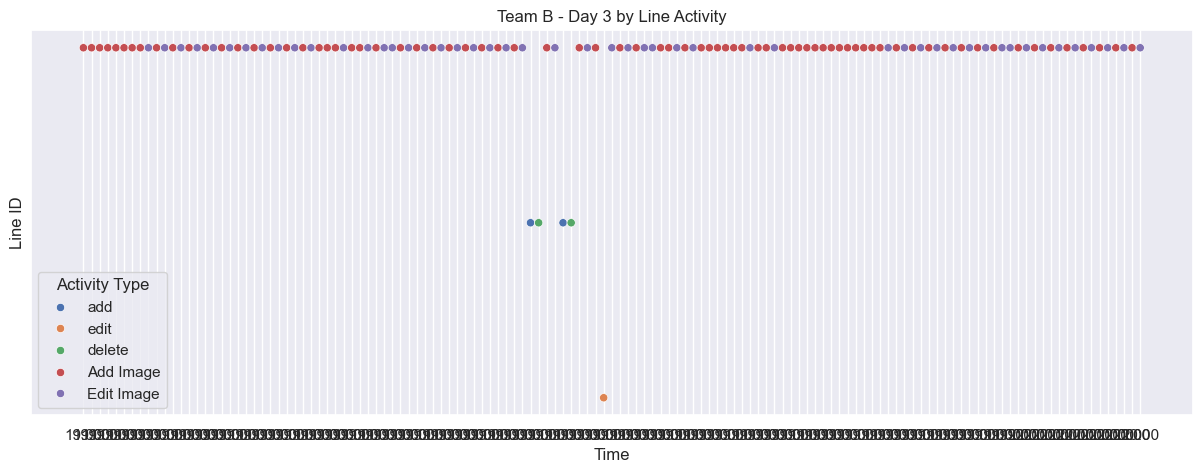

In [ ]:
#TeamB Day 3 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Line ID', hue = 'Activity Type', data = Team_B_Day3, hue_order = hue_order)
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day3['Time'])), (max(Team_A_Day3['Time'])))
visual.set_yticks([])
visual.set_title('Team B - Day 3 by Line Activity')
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig(figures_dir / 'Team_B_Day3_linechanges.png')

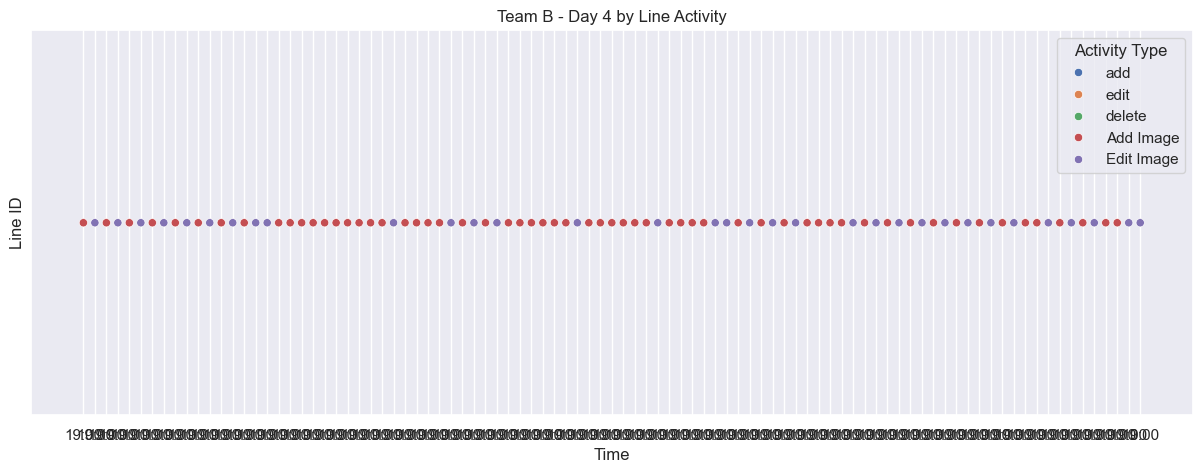

In [ ]:
#TeamB Day 4 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Line ID', hue = 'Activity Type', data = Team_B_Day4, hue_order = hue_order)
visual.set_title('Team B - Day 4 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day4['Time'])), (max(Team_A_Day4['Time'])))
visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig(figures_dir / 'Team_B_Day4_linechanges.png')

In [ ]:
#Team A User 1 Activity Type by Day 
visual = sb.countplot(x = 'Day',hue = "Activity Type", data = Team_A_user1, hue_order = hue_order)
visual.set_title('Teams A - User 1 - Type of Events by Day')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.savefig(figures_dir / 'Team_A_User1_ActivitiesbyDay.png')

In [ ]:
#TeamA User 1 Activity Actions by line 
visual = sb.scatterplot(x = 'Time',y= 'Line ID', hue = 'Activity Type', data = Team_A_user1_Day1, hue_order = hue_order)
visual.set_title('Team A - User 1: Day 1 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day1['Time'])), (max(Team_A_Day1['Time'])))
visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig( figures_dir / 'Team_A_user1_Day1_linechanges.png')

In [ ]:
#TeamA User 1 Activity Actions by line 
visual = sb.scatterplot(x = 'Time',y= 'Line ID', hue = 'Activity Type', data = Team_A_user1_Day2, hue_order = hue_order)
visual.set_title('Team A - User 1: Day 2 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day2['Time'])), (max(Team_A_Day2['Time'])))
visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig( figures_dir / 'Team_A_user1_Day2_linechanges.png')

In [ ]:
#TeamA User 1 Activity Actions by line 
visual = sb.scatterplot(x = 'Time',y= 'Line ID', hue = 'Activity Type', data = Team_A_user1_Day3, hue_order = hue_order)
visual.set_title('Team A - User 1: Day 3 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day3['Time'])), (max(Team_A_Day3['Time'])))
visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig( figures_dir / 'Team_A_user1_Day3_linechanges.png')

In [ ]:
#TeamA User 1 Activity Actions by line 
visual = sb.scatterplot(x = 'Time',y= 'Line ID', hue = 'Activity Type', data = Team_A_user1_Day4, hue_order = hue_order)
visual.set_title('Team A - User 1: Day 4 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day4['Time'])), (max(Team_A_Day4['Time'])))
visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig( figures_dir / 'Team_A_user1_Day4_linechanges.png')

In [ ]:
#Team A User2
visual = sb.countplot(x = 'Type of Action', data = Team_A_user1)
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
visual.set_title('Team A - User 1 Type of Action for All Days')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
#sb.set_theme(rc={"figure.figsize":(15, 5)})
fig.savefig( figures_dir / 'TeamA_User1_TypeofActionofAllDay.png')

In [ ]:
#Team A User1 Day1 Action on Day 1
visual = sb.countplot(x = 'Type of Action', data = Team_A_user1_Day1)
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
visual.set_title('Team 1 - User 1: Day 1 Type of Action')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
fig.savefig( figures_dir / 'TeamA_User1_Day1_TypeofActionbyDay.png')

In [ ]:
#Team A User1 Day1 Action on Day 2 
visual = sb.countplot(x = 'Type of Action', data = Team_A_user1_Day2)
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
visual.set_title('Team 1 - User 1: Day 2 Type of Action')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
fig.savefig( figures_dir / 'TeamA_User1_Day2_TypeofActionbyDay.png')

In [ ]:
#Team A User1 Day1 Action on Day 3 
visual = sb.countplot(x = 'Type of Action', data = Team_A_user1_Day3)
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
visual.set_title('Team 1 - User 1: Day 3 Type of Action')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
fig.savefig( figures_dir / 'TeamA_User1_Day3_TypeofActionbyDay.png')

In [ ]:
#Team A User1 Day1 Action on Day 2 
visual = sb.countplot(x = 'Type of Action', data = Team_A_user1_Day4)
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
visual.set_title('Team 1 - User 1: Day 4 Type of Action')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
fig.savefig( figures_dir / 'TeamA_User1_Day4_TypeofActionbyDay.png')

In [ ]:
#TeamA User 1 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_user1_Day1)
visual.set_title('Team A - User 1: Day 1 Timeline of Type of Actions')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day1['Time'])), (max(Team_A_Day1['Time'])))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_user1_Day1_timeline_typeofactivity.png')

In [ ]:
#TeamA User 1 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_user1_Day2)
visual.set_title('Team A - User 1: Day 2 Timeline of Type of Actions')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day2['Time'])), (max(Team_A_Day2['Time'])))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_user1_Day2_timeline_typeofactivity.png')

In [ ]:
#TeamA User 1 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_user1_Day3)
visual.set_title('Team A - User 1: Day 3 Timeline of Type of Actions')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day3['Time'])), (max(Team_A_Day3['Time'])))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_user1_Day3_timeline_typeofactivity.png')

In [ ]:
#TeamA User 1 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_user1_Day4)
visual.set_title('Team A - User 1: Day 4 Timeline of Type of Actions')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day4['Time'])), (max(Team_A_Day4['Time'])))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_user1_Day4_timeline_typeofactivity.png')

In [ ]:
#Team A User 2 Activity Type by Day 
visual = sb.countplot(x = 'Day',hue = "Activity Type", data = Team_A_user2, hue_order = hue_order)
visual.set_title('Teams A - User 2 - Type of Events by Day')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.savefig( figures_dir / 'Team_A_User2_ActivitiesbyDay.png')

In [ ]:
#TeamA User 2 Activity Actions by line 
visual = sb.scatterplot(x = 'Time',y= 'Line ID', hue = 'Activity Type', data = Team_A_user2_Day1, hue_order = hue_order)
visual.set_title('Team A - User 2: Day 1 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day1['Time'])), (max(Team_A_Day1['Time'])))
visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig( figures_dir / 'Team_A_user2_Day1_linechanges.png')

In [ ]:
#TeamA User 2 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Line ID', hue = 'Activity Type', data = Team_A_user2_Day2, hue_order = hue_order)
visual.set_title('Team A - User 2: Day 2 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day2['Time'])), (max(Team_A_Day2['Time'])))
visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig( figures_dir / 'Team_A_user2_Day2_linechanges.png')

In [ ]:
#TeamA User 2 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Line ID', hue = 'Activity Type', data = Team_A_user2_Day3, hue_order = hue_order)
visual.set_title('Team A - User 2: Day 3 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day3['Time'])), (max(Team_A_Day3['Time'])))
visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig( figures_dir / 'Team_A_user2_Day3_linechanges.png')

In [ ]:
#TeamA User 2 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Line ID', hue = 'Activity Type', data = Team_A_user2_Day4, hue_order = hue_order)
visual.set_title('Team A - User 2: Day 4 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day4['Time'])), (max(Team_A_Day4['Time'])))
visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig( figures_dir / 'Team_A_user2_Day4_linechanges.png')

In [ ]:
#Team A User2
visual = sb.countplot(x = 'Type of Action', data = Team_A_user2)
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
visual.set_title('Team A - User 2 Type of Action for All Days')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
#sb.set_theme(rc={"figure.figsize":(15, 5)})
fig.savefig( figures_dir / 'TeamA_User2_TypeofActionofAllDay.png')

In [ ]:
#Team A User2 Day1 Action on Day 1 
visual = sb.countplot(x = 'Type of Action', data = Team_A_user2_Day1)
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
visual.set_title('Team A - User 2: Day 1 Type of Action')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
#sb.set_theme(rc={"figure.figsize":(15, 5)})
fig.savefig( figures_dir / 'TeamA_User2_Day1_TypeofActionbyDay.png')

In [ ]:
#Team A User2 Day1 Action on Day 2 
if not (Team_A_user2_Day2.empty):
    visual = sb.countplot(x = 'Type of Action', data = Team_A_user2_Day2)
visual.set_title('Team 1 - User 2: Day 2 Type of Action')
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.savefig( figures_dir / 'TeamA_User2_Day2_TypeofActionbyDay.png')

In [ ]:
if not (Team_A_user2_Day3.empty):#Team A User2 Day1 Action on Day 3 

    visual = sb.countplot(x = 'Type of Action', data = Team_A_user2_Day3)
visual.set_title('Team 1 - User 2: Day 3 Type of Action')
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
fig.savefig( figures_dir / 'TeamA_User2_Day3_TypeofActionbyDay.png')

In [ ]:
#Team A User2 Day1 Action on Day 4 
if not (Team_A_user2_Day4.empty):
    visual = sb.countplot(x = 'Type of Action', data = Team_A_user2_Day4)
visual.set_title('Team 1 - User 2: Day 4 Type of Action')
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
fig.savefig( figures_dir / 'TeamA_User2_Day4_TypeofActionbyDay.png')

In [ ]:
#TeamA User 2 Activity Actions by line 
if not (Team_A_user2_Day1.empty):
    visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_user2_Day1)
visual.set_title('Team A - User 2: Day 1 Timeline of Type of Actions')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day1['Time'])), (max(Team_A_Day1['Time'])))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_user2_Day1_timeline_typeofactivity.png')

In [ ]:
#TeamA User 2 Activity Actions by line 
if not (Team_A_user2_Day2.empty):
    visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_user2_Day2)
visual.set_title('Team A - User 2: Day 2 Timeline of Type of Actions')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day2['Time'])), (max(Team_A_Day2['Time'])))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_user2_Day2_timeline_typeofactivity.png')

In [ ]:
#TeamA User 2 Activity Actions by line 
if not (Team_A_user2_Day2.empty):
    visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_user2_Day3)
visual.set_title('Team A - User 2: Day 3 Timeline of Type of Actions')
#visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day3['Time'])), (max(Team_A_Day3['Time'])))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_user2_Day3_timeline_typeofactivity.png')

In [ ]:
#TeamA User 2 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_user2_Day4)
visual.set_title('Team A - User 2: Day 4 Timeline of Type of Actions')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day4['Time'])), (max(Team_A_Day4['Time'])))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_user2_Day4_timeline_typeofactivity.png')

In [ ]:
#Team A User 3 Activity Type by Day 
visual = sb.countplot(x = 'Day',hue = "Activity Type", data = Team_A_user3, hue_order = hue_order)
visual.set_title('Teams A - User 3 - Type of Events by Day')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.savefig( figures_dir / 'Team_A_User3_ActivitiesbyDay.png')

In [ ]:
#TeamA User 3 Activity Actions by line 
visual = sb.scatterplot(x = 'Time',y= 'Line ID', hue = 'Activity Type', data = Team_A_user3_Day1, hue_order = hue_order)
visual.set_title('Team A - User 3: Day 1 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day1['Time'])), (max(Team_A_Day1['Time'])))
visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig( figures_dir / 'Team_A_user3_Day1_linechanges.png')

In [ ]:
#TeamA User 3 Activity Actions by line 
visual = sb.scatterplot(x = 'Time',y= 'Line ID', hue = 'Activity Type', data = Team_A_user3_Day2, hue_order = hue_order)
visual.set_title('Team A - User 3: Day 2 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day2['Time'])), (max(Team_A_Day2['Time'])))
visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig( figures_dir / 'Team_A_user3_Day2_linechanges.png')

In [ ]:
#TeamA User 3 Activity Actions by line 
visual = sb.scatterplot(x = 'Time',y= 'Line ID', hue = 'Activity Type', data = Team_A_user3_Day3, hue_order = hue_order)
visual.set_title('Team A - User 3: Day 3 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day3['Time'])), (max(Team_A_Day3['Time'])))
visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig( figures_dir / 'Team_A_user3_Day3_linechanges.png')

In [ ]:
#TeamA User 3 Activity Actions by line 
visual = sb.scatterplot(x = 'Time',y= 'Line ID', hue = 'Activity Type', data = Team_A_user3_Day4, hue_order = hue_order)
visual.set_title('Team A - User 3: Day 4 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day4['Time'])), (max(Team_A_Day4['Time'])))
visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig( figures_dir / 'Team_A_user3_Day4_linechanges.png')

In [ ]:
#Team A User4
visual = sb.countplot(x = 'Type of Action', data = Team_A_user3)
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
visual.set_title('Team A - User 3 Type of Action for All Days')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
#sb.set_theme(rc={"figure.figsize":(15, 5)})
fig.savefig( figures_dir / 'TeamA_User3_TypeofActionofAllDay.png')

In [ ]:
#Team A User3 Action on Day 1 
visual = sb.countplot(x = 'Type of Action', data = Team_A_user3_Day1)
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
visual.set_title('Team A - User 3: Day 1 Type of Action')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
#sb.set_theme(rc={"figure.figsize":(15, 5)})
fig.savefig( figures_dir / 'TeamA_User3_Day1_TypeofActionbyDay.png')

In [ ]:
#Team A User3 Action on Day 2
visual = sb.countplot(x = 'Type of Action', data = Team_A_user3_Day2)
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
visual.set_title('Team A - User 3: Day 2 Type of Action')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
#sb.set_theme(rc={"figure.figsize":(15, 5)})
fig.savefig( figures_dir / 'TeamA_User3_Day2_TypeofActionbyDay.png')

In [ ]:
#Team A User3 Action on Day 3
visual = sb.countplot(x = 'Type of Action', data = Team_A_user3_Day3)
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
visual.set_title('Team A - User 3: Day 3 Type of Action')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
#sb.set_theme(rc={"figure.figsize":(15, 5)})
fig.savefig( figures_dir / 'TeamA_User3_Day3_TypeofActionbyDay.png')

In [ ]:
#Team A User3 Action on Day 2
visual = sb.countplot(x = 'Type of Action', data = Team_A_user3_Day4)
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
visual.set_title('Team A - User 3: Day 4 Type of Action')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
#sb.set_theme(rc={"figure.figsize":(15, 5)})
fig.savefig( figures_dir / 'TeamA_User3_Day4_TypeofActionbyDay.png')

In [ ]:
#TeamA User 3 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_user3_Day1)
visual.set_title('Team A - User 3: Day 1 Timeline of Type of Actions')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day1['Time'])), (max(Team_A_Day1['Time'])))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_user3_Day1_timeline_typeofactivity.png')

In [ ]:
#TeamA User 3 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_user3_Day2)
visual.set_title('Team A - User 3: Day 2 Timeline of Type of Actions')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day2['Time'])), (max(Team_A_Day2['Time'])))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_user3_Day2_timeline_typeofactivity.png')

In [ ]:
#TeamA User 3 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_user3_Day3)
visual.set_title('Team A - User 3: Day 3 Timeline of Type of Actions')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_xlim((min(Team_A_Day3['Time'])), (max(Team_A_Day3['Time'])))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_user3_Day3_timeline_typeofactivity.png')

In [ ]:
#TeamA User 2 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_user3_Day4)
visual.set_title('Team A - User 3: Day 4 Timeline of Type of Actions')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day4['Time'])), (max(Team_A_Day4['Time'])))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_user3_Day4_timeline_typeofactivity.png')

In [ ]:
#Team A User 4 Activity Type by Day 
visual = sb.countplot(x = 'Day',hue = "Activity Type", data = Team_A_user4, hue_order = hue_order)
visual.set_title('Teams A - User 4 - Type of Events by Day')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.savefig( figures_dir / 'Team_A_User4_ActivitiesbyDay.png')

In [ ]:
#TeamA User 4 Activity Actions by line 
visual = sb.scatterplot(x = 'Time',y= 'Line ID', hue = 'Activity Type', data = Team_A_user4_Day1, hue_order = hue_order)
visual.set_title('Team A - User 4: Day 1 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
visual.set_yticks([])
#visual.set_xlim((min(Team_A_Day1['Time'])), (max(Team_A_Day1['Time'])))
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig( figures_dir / 'Team_A_user4_Day1_linechanges.png')

In [ ]:
#TeamA User 3 Activity Actions by line 
visual = sb.scatterplot(x = 'Time',y= 'Line ID', hue = 'Activity Type', data = Team_A_user4_Day2, hue_order = hue_order)
visual.set_title('Team A - User 4: Day 2 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day2['Time'])), (max(Team_A_Day2['Time'])))
visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig( figures_dir / 'Team_A_user4_Day2_linechanges.png')

In [ ]:
#TeamA User 3 Activity Actions by line 
visual = sb.scatterplot(x = 'Time',y= 'Line ID', hue = 'Activity Type', data = Team_A_user4_Day3, hue_order = hue_order)
visual.set_title('Team A - User 4: Day 3 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day3['Time'])), (max(Team_A_Day3['Time'])))
visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig( figures_dir / 'Team_A_user4_Day3_linechanges.png')

In [ ]:
#TeamA User 4 Activity Actions by line 
visual = sb.scatterplot(x = 'Time',y= 'Line ID', hue = 'Activity Type', data = Team_A_user4_Day4, hue_order = hue_order)
visual.set_title('Team A - User 4: Day 4 by Line Activity')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day4['Time'])), (max(Team_A_Day4['Time'])))
visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.savefig( figures_dir / 'Team_A_user4_Day4_linechanges.png')

In [ ]:
#Team A User4
visual = sb.countplot(x = 'Type of Action', data = Team_A_user4)
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
visual.set_title('Team A - User 4 Type of Action for All Days')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
#sb.set_theme(rc={"figure.figsize":(15, 5)})
fig.savefig( figures_dir / 'TeamA_User4_TypeofActionofAllDay.png')

In [ ]:
#Team A User4 Action on Day 1 
visual = sb.countplot(x = 'Type of Action', data = Team_A_user4_Day1)
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
visual.set_title('Team A - User 4: Day 1 Type of Action')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
#sb.set_theme(rc={"figure.figsize":(15, 5)})
fig.savefig( figures_dir / 'TeamA_User4_Day1_TypeofActionbyDay.png')

In [ ]:
#Team A User4 Action on Day 2
visual = sb.countplot(x = 'Type of Action', data = Team_A_user4_Day2)
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
visual.set_title('Team A - User 4: Day 2 Type of Action')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
#sb.set_theme(rc={"figure.figsize":(15, 5)})
fig.savefig( figures_dir / 'TeamA_User4_Day2_TypeofActionbyDay.png')

In [ ]:
#Team A User4 Action on Day 3
visual = sb.countplot(x = 'Type of Action', data = Team_A_user4_Day3)
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
visual.set_title('Team A - User 4: Day 3 Type of Action')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
#sb.set_theme(rc={"figure.figsize":(15, 5)})
fig.savefig( figures_dir / 'TeamA_User4_Day3_TypeofActionbyDay.png')

In [ ]:
#Team A User4 Action on Day 4 
visual = sb.countplot(x = 'Type of Action', data = Team_A_user4_Day4)
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
visual.set_title('Team A - User 4: Day 4 Type of Action')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
#sb.set_theme(rc={"figure.figsize":(15, 5)})
fig.savefig( figures_dir / 'TeamA_User4_Day4_TypeofActionbyDay.png')

In [ ]:
#TeamA User 4 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_user4_Day1)
visual.set_title('Team A - User 4: Day 1 Timeline of Type of Actions')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day1['Time'])), (max(Team_A_Day1['Time'])))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_user4_Day1_timeline_typeofactivity.png')

In [ ]:
#TeamA User 4 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_user4_Day2)
visual.set_title('Team A - User 4: Day 2 Timeline of Type of Actions')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day2['Time'])), (max(Team_A_Day2['Time'])))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_user4_Day2_timeline_typeofactivity.png')

In [ ]:
#TeamA User 4 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_user4_Day3)
visual.set_title('Team A - User 4: Day 3 Timeline of Type of Actions')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day3['Time'])), (max(Team_A_Day3['Time'])))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_user4_Day3_timeline_typeofactivity.png')

In [ ]:
#TeamA User 4 Activity Actions by line 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_user4_Day4)
visual.set_title('Team A - User 4: Day 4 Timeline of Type of Actions')
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_xlim((min(Team_A_Day4['Time'])), (max(Team_A_Day4['Time'])))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_user4_Day4_timeline_typeofactivity.png')

In [ ]:
#Team A User4
visual = sb.countplot(x = 'Type of Action', data = Team_A_LastOnly)
visual.set_xticklabels(visual.get_xticklabels(), rotation=45, horizontalalignment='right')
visual.set_title('Team A - Type of Action for All Days - Last Activity Per Line Only')
for i in visual.containers:
    visual.bar_label(i,)
fig = visual.get_figure()
fig.subplots_adjust(bottom=0.5)
#sb.set_theme(rc={"figure.figsize":(15, 5)})
fig.savefig( figures_dir / 'TeamA_LO_TypeofActionofAllDay_lastonly.png')

In [ ]:
#TeamA Day 1  Activity Actions by line Last Only
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_Day1_LO)
visual.set_title('Team A - Day 1 Timeline of Type of Actions - Last Activity Per Line Only')
#visual.set_xlim((min(Team_A_Day1['Time'])), (max(Team_A_Day1['Time'])))
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_Day1_timeline_typeofactivity_LastOnly.png')

In [ ]:
#TeamA Day 2 Activity Actions by line - last only 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_Day2_LO)
visual.set_title('Team A - Day 2 Timeline of Type of Actions - Last Activity Per Line Only')
#visual.set_xlim((min(Team_A_Day2['Time'])), (max(Team_A_Day2['Time'])))
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_Day2_timeline_typeofactivity_LastOnly.png')

In [ ]:
#TeamA Day 3 Activity Actions by line - last only 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_Day3_LO)
visual.set_title('Team A - Day 3 Timeline of Type of Actions - Last Activity Per Line Only')
#visual.set_xlim((min(Team_A_Day3['Time'])), (max(Team_A_Day3['Time'])))
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_Day3_timeline_typeofactivity_LastOnly.png')

In [ ]:
#TeamA Day 4 Activity Actions by line - last only 
visual = sb.scatterplot(x = 'Time', y= 'Type of Action', hue = 'Activity Type', data = Team_A_Day4_LO)
visual.set_title('Team A - Day 4 Timeline of Type of Actions - Last Activity Per Line Only')
#visual.set_xlim((min(Team_A_Day4['Time'])), (max(Team_A_Day4['Time'])))
visual.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=tz.gettz('US/Eastern')))
#visual.set_yticks([])
sb.set_theme(rc={"figure.figsize":(15, 5)})
plt.subplots_adjust(left=0.2)
plt.savefig( figures_dir / 'Team_A_Day4_timeline_typeofactivity_LastOnly.png')

In [ ]:
#identify when a certain topic is being discussed, make a data table 
processed_dir = Path().resolve().parent / 'data/processed'
Team_A_user1_Day1.to_excel('TeamA_User1_Day1.xlsx', sheet_name="Sheet 1", index=False)
